In [2]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import netCDF4 as nc
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma

In [4]:
dir = "/data/watkinson/Spring2022/Satellite/data/cafe/1day/"
data = xr.open_mfdataset(dir + "A*",concat_dim='time',combine='nested') #this is excluding day 10 file because it was causing error
#print(data)

In [5]:

phyto=xr.DataArray(data.phyto_c)
phyto=np.nan_to_num(phyto,copy=False,nan=0,posinf=None,neginf=None)
#print(phyto)
phyto_bool=np.array(phyto,dtype=bool)
#print(phyto_bool)
phyto_array=xr.DataArray(1*phyto_bool)
#print(phyto_array)
phyto_sum=np.sum(phyto_array,axis=0)
np.shape(phyto_sum)

print(phyto_sum)

<xarray.DataArray (dim_1: 1440, dim_2: 2112)>
array([[  0,   0,   0, ..., 193, 193, 193],
       [  0,   0,   0, ..., 193, 193, 193],
       [  0,   0,   0, ..., 193, 193, 193],
       ...,
       [ 70,  70,  54, ..., 126, 126, 126],
       [ 70,  70,  54, ..., 126, 126, 126],
       [ 70,  70,  54, ..., 126, 126, 126]])
Dimensions without coordinates: dim_1, dim_2


In [6]:
phyto_pixels_map = phyto_sum/1669
phyto_pixels_map = phyto_pixels_map * 100
print(phyto_pixels_map)

<xarray.DataArray (dim_1: 1440, dim_2: 2112)>
array([[ 0.        ,  0.        ,  0.        , ..., 11.56381067,
        11.56381067, 11.56381067],
       [ 0.        ,  0.        ,  0.        , ..., 11.56381067,
        11.56381067, 11.56381067],
       [ 0.        ,  0.        ,  0.        , ..., 11.56381067,
        11.56381067, 11.56381067],
       ...,
       [ 4.19412822,  4.19412822,  3.23547034, ...,  7.5494308 ,
         7.5494308 ,  7.5494308 ],
       [ 4.19412822,  4.19412822,  3.23547034, ...,  7.5494308 ,
         7.5494308 ,  7.5494308 ],
       [ 4.19412822,  4.19412822,  3.23547034, ...,  7.5494308 ,
         7.5494308 ,  7.5494308 ]])
Dimensions without coordinates: dim_1, dim_2


In [11]:
phyto_pixels=np.sum(phyto_array,axis=1)
phyto_pixels=np.sum(phyto_pixels,axis=1)
#np.shape(phyto_pixels)
phyto_percent_pixels=phyto_pixels/3041280
np.shape(phyto_percent_pixels)
print(phyto_percent_pixels)

<xarray.DataArray (dim_0: 363)>
array([0.1160347 , 0.12876815, 0.21647826, 0.18076698, 0.07886285,
       0.05461977, 0.15299413, 0.10036005, 0.1512646 , 0.13309429,
       0.13958136, 0.13384397, 0.12158006, 0.20214153, 0.0826596 ,
       0.14341757, 0.16181049, 0.0577155 , 0.06850438, 0.06786222,
       0.0771195 , 0.06092205, 0.06246909, 0.11023253, 0.09660209,
       0.06691623, 0.06301097, 0.06651311, 0.07527258, 0.21875493,
       0.08331163, 0.04464896, 0.11737098, 0.10239504, 0.19257681,
       0.13561198, 0.09827836, 0.09045665, 0.18509772, 0.08468408,
       0.08192307, 0.03343132, 0.10876572, 0.07365813, 0.06644834,
       0.20231251, 0.13283486, 0.20177655, 0.13058942, 0.16885884,
       0.21880688, 0.20109066, 0.24326271, 0.16049196, 0.13255734,
       0.09443655, 0.12455545, 0.17323791, 0.19420244, 0.23553898,
       0.1622067 , 0.24223353, 0.21241319, 0.21528337, 0.17388863,
       0.19876171, 0.09634726, 0.06804273, 0.14356981, 0.11042291,
       0.134278  , 0.09731396,

Max Value is:  <xarray.DataArray ()>
array(36.30916717)
(array([1021, 1021, 1021, 1022, 1022, 1023, 1023, 1023]), array([1897, 1898, 1900, 1897, 1898, 1897, 1898, 1899]))
Min Value is:  <xarray.DataArray ()>
array(0.)
(array([   0,    0,    0, ..., 1439, 1439, 1439]), array([  0,   1,   2, ..., 885, 886, 887]))


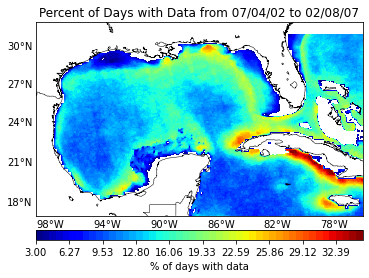

In [12]:
#jan_phyto = phyto_array.sel(time=slice('2006-01-01','2006-01-31'))
#jan_phyto_sum = jan_phyto.sum(axis=0)
#jan_phyto_sum=np.sum(phyto_array.sel(time=slice('2006-01-01','2006-01-31')),axis=0)
#jan_phyto_sum = np.sum(phyto_array[274:365],axis=0)
#print(jan_phyto_sum)
lon=data.phyto_c.lon
lat=data.phyto_c.lat
#from Map_plot_Sat import *
map_plot(lon,lat,phyto_pixels_map,'% of days with data',
         'Percent of Days with Data from 07/04/02 to 02/08/07',True,np.linspace(3,35,50),10)

In [8]:
def map_plot(XC,YC,z,cbtitle,title,cbar_range,level,font):
    
    #lat=YC[0,:]
    #lon=XC[:,0]
    lat=YC
    lon=XC
    m1 = Basemap(projection='cea', llcrnrlon=-99, llcrnrlat=17, urcrnrlon=-76, 
             urcrnrlat=32, resolution='i')
    m1.drawcoastlines(color='k', linewidth=.5)
    m1.drawcountries()
    m1.drawmeridians(np.arange(-98,-74,4),labels=[0,0,0,1],linewidth=0)
    m1.drawparallels(np.arange(18,33,3),labels=[1,0,0,0],linewidth=0)

    #make 2d lon and lat arrays
    lon2d,lat2d=np.meshgrid(lon,lat)
    x,y=m1(lon2d,lat2d)

    colormap = cm.get_cmap('jet')
    if (cbar_range):#True = set a range for the colorbar
        cs_data = m1.contourf(x, y, z,cmap=colormap,levels=level)
    else:
        cs_data = m1.contourf(x, y, z,cmap=colormap)
    #cnt_chirp_19 = m1.contour(x, y, np.transpose(Zs[16, 0, :, :]), 
                          #colors='black', linewidths=1)  # ,levels=range(0,30,2))
    cb_data= m1.colorbar(cs_data, location='bottom',format='%.2f',
                         pad=.2)
    cb_data.ax.tick_params(labelsize=font)#adjust size of font
    cb_data.set_label(cbtitle)
   #plt.clabel(cnt_chirp_19, fmt='%.0f', fontsize=3, inline=True)
    plt.title(title)
    maxdata=np.max(z)
    mindata=np.min(z)
    print('Max Value is: ',maxdata)# print the max data from map plot
    alpha = np.where(z==maxdata)
    print(alpha)
    print('Min Value is: ',mindata)
    beta=np.where(z==mindata)
    print(beta)
    #summry(z)
    plt.show()

Max Value is:  <xarray.DataArray 'phyto_c' ()>
dask.array<nanmax-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2006-02-01
(array([452, 453, 454, 455]), array([1989, 1989, 1989, 1989]))
Min Value is:  <xarray.DataArray 'phyto_c' ()>
dask.array<nanmin-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2006-02-01
(array([812, 812, 812, 812, 813, 813, 813, 813, 814, 814, 814, 814, 815,
       815, 815, 815]), array([178, 179, 180, 181, 178, 179, 180, 181, 178, 179, 180, 181, 178,
       179, 180, 181]))


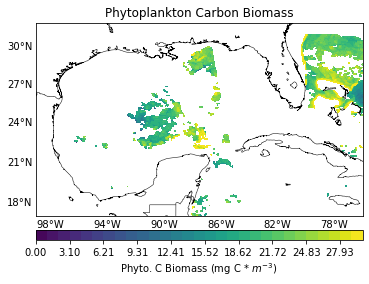

In [10]:
lon=data.phyto_c.lon
lat=data.phyto_c.lat
from Map_plot_Sat import *
map_plot(lon,lat,data.phyto_c.sel(time='2006-02-01'),'Phyto. C Biomass (mg C * $m^{-3}$)',
         'Phytoplankton Carbon Biomass',True,np.linspace(0,30,30),10)

Max Value is:  135
(array([880, 880, 880, 880, 880, 880, 880, 880, 880, 881, 881, 881, 881,
       881, 881, 881, 881, 881, 882, 882, 882, 882, 882, 882, 882, 882,
       882, 883, 883, 883, 883, 883, 883, 883, 883, 883, 884, 884, 884,
       884, 885, 885, 885, 885, 886, 886, 886, 886, 887, 887, 887, 887]), array([1642, 1643, 1644, 1645, 1650, 1651, 1652, 1653, 1654, 1642, 1643,
       1644, 1645, 1650, 1651, 1652, 1653, 1654, 1642, 1643, 1644, 1645,
       1650, 1651, 1652, 1653, 1654, 1642, 1643, 1644, 1645, 1650, 1651,
       1652, 1653, 1654, 1638, 1639, 1640, 1641, 1638, 1639, 1640, 1641,
       1638, 1639, 1640, 1641, 1638, 1639, 1640, 1641]))
Min Value is:  0
(array([   0,    0,    0, ..., 1439, 1439, 1439]), array([  0,   1,   2, ..., 885, 886, 887]))


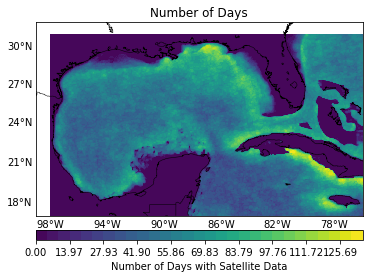

In [14]:
lon=data.phyto_c.lon
lat=data.phyto_c.lat
from Map_plot_Sat import *
map_plot(lon,lat,phyto_sum,'Number of Days with Satellite Data',
         'Number of Days',True,np.linspace(0,135,30),10)

In [19]:
np.count_nonzero(phyto_sum == 0)

1019874

In [55]:
#points = np.count_nonzero(data.phyto_c < 110000000000)
#print(points)
masked_points = np.count_nonzero(np.isnan(data.phyto_c))
print(masked_points)
points = np.count_nonzero(~np.isnan(data.phyto_c))
print(points)

1001001424
102983216


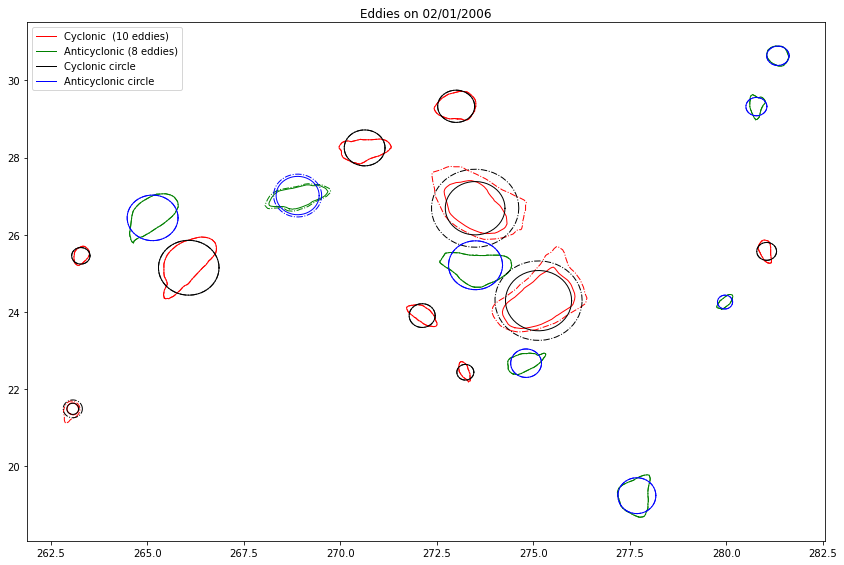

In [65]:
from py_eddy_tracker.observations.observation import EddiesObservations
a = EddiesObservations.load_file("/data/watkinson/Fall2021/Satellite/data/eddies/Anticyclonic/Anticyclonic_20060201.nc")
c= EddiesObservations.load_file("/data/watkinson/Fall2021/Satellite/data/eddies/Cyclonic/Cyclonic_20060201.nc")
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))
ax.set_aspect("equal")
ax.set_title('Eddies on 02/01/2006')
#ax.set_xlim(10, 70)
#ax.set_ylim(-50, -25)

cyclonic = c.display(ax, label="Cyclonic  ({nb_obs} eddies)", color="r", lw=1)
anticyclonic = a.display(ax,label='Anticyclonic ({nb_obs} eddies)',color='g',lw=1)
# Replace contours by circles using center and radius (effective is dashed)
c.circle_contour()
c.display(ax, label="Cyclonic circle", color="k", lw=1)
a.circle_contour()
a.display(ax,label='Anticyclonic circle',color='b',lw=1)
_= ax.legend(loc="best")

In [56]:
data.phyto_c

<xarray.DataArray 'phyto_c' (time: 363, lat: 1440, lon: 2112)>
dask.array<concatenate, shape=(363, 1440, 2112), dtype=float64, chunksize=(1, 1440, 2112), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2006-12-31
  * lat      (lat) float32 30.99 30.98 30.97 30.96 ... 16.04 16.03 16.02 16.01
  * lon      (lon) float32 -97.99 -97.98 -97.97 -97.96 ... -76.03 -76.02 -76.01
Attributes:
    long_name:  Phytoplankton carbon biomass
    units:      mg C m-3

In [34]:
print(data.phyto_c[0,:,:])

<xarray.DataArray 'phyto_c' (lat: 1440, lon: 2112)>
dask.array<getitem, shape=(1440, 2112), dtype=float64, chunksize=(1440, 2112), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2006-01-01
  * lat      (lat) float32 30.99 30.98 30.97 30.96 ... 16.04 16.03 16.02 16.01
  * lon      (lon) float32 -97.99 -97.98 -97.97 -97.96 ... -76.03 -76.02 -76.01
Attributes:
    long_name:  Phytoplankton carbon biomass
    units:      mg C m-3


In [40]:
print(data.phyto_c[0,1400,2000])



<xarray.DataArray 'phyto_c' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2006-01-01
    lat      float32 16.41
    lon      float32 -77.16
Attributes:
    long_name:  Phytoplankton carbon biomass
    units:      mg C m-3


In [74]:
import xarray as xr
dir = "/data/watkinson/Fall2021/Satellite/data/eddies/Anticyclonic/"
data = xr.open_mfdataset(dir + "Anticyclonic*",concat_dim='time',combine='nested')

ValueError: arguments without labels along dimension 'obs' cannot be aligned because they have different dimension sizes: {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}